In [ ]:
import os
from matplotlib import pyplot as plt

# os.chdir("/home/zhang.14217/bioclip-dev")
os.chdir("#### YOUR WORKING DIRECTORY ####")

def read_accu(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    acc_arr = []
    balanced_acc_arr = []
    for line in lines:
        if not "INFO - Number of samples: " in line:
            continue
        acc = line.split("acc: ")[1].split(", b")[0]
        balanced_acc = line.split("balanced acc: ")[1].split(", loss")[0]
        balanced_acc = balanced_acc.replace(". \n", "")
        # print(acc)
        acc = float(acc)
        balanced_acc = float(balanced_acc)
        acc_arr.append(acc)
        balanced_acc_arr.append(balanced_acc)
    return acc_arr, balanced_acc_arr


Dataset: MAD_MAD05_new


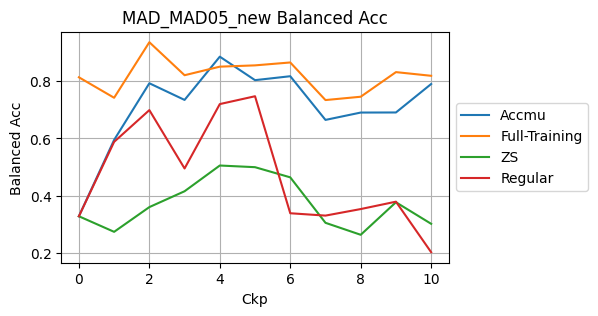

In [ ]:
file_paths = {
    "MAD_MAD05_new": {
        "Accmu": "log/pipeline/MAD_MAD05_new/ce/accumulative-scratch/log/log.txt",
        "Full-Training": "log/pipeline/MAD_MAD05_new/ce/percentage-1/log/log.txt",
        "ZS": "log/pipeline/MAD_MAD05_new/ce/zs/log/log.txt",
        "Regular": "log/pipeline/MAD_MAD05_new/ce/regular/log/log.txt",
    }
    "ENO_B06": {
        "Accmu": "log/pipeline/ENO_B06/ce/accumulative-scratch/log/log.txt",
        "Full-Training": "log/pipeline/ENO_B06/ce/percentage-1/log/log.txt",
        "ZS": "log/pipeline/ENO_B06/ce/zs/log/log.txt",
        "Regular": "log/pipeline/ENO_B06/ce/regular/log/log.txt",
    }
    "PLN_D01": {
        "Accmu": "log/pipeline/PLN_D01/ce/accumulative-scratch/log/log.txt",
        "Full-Training": "log/pipeline/PLN_D01/ce/percentage-1/log/log.txt",
        "ZS": "log/pipeline/PLN_D01/ce/zs/log/log.txt",
        "Regular": "log/pipeline/PLN_D01/ce/regular/log/log.txt",
    }
    # If you have more datasets, add them here following the same structure
}

for dset, file_list in file_paths.items():
    print(f"Dataset: {dset}")
    all_acc = []
    all_balanced_acc = []
    all_name = []
    for exp_name, file_path in file_list.items():
        acc, balanced_acc = read_accu(file_path)
        all_acc.append(acc)
        all_balanced_acc.append(balanced_acc)
        all_name.append(exp_name)

    # Plot Balanced Acc
    plt.figure(figsize=(5, 3))
    for i, acc in enumerate(all_balanced_acc):
        lb = all_name[i]
        lb = lb.replace("30:", "")
        lb = lb.replace("cb_log:", "")
        lb = lb.replace("b0.9", "balanced-ce")
        plt.plot(acc, label=lb)
    plt.xlabel("Ckp")
    plt.ylabel("Balanced Acc")
    plt.title(f"{dset} Balanced Acc")
    plt.legend(
        loc='center left',
        bbox_to_anchor=(1, 0.5)
    )
    plt.grid()
    plt.show()
